In [1]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/My Drive

/content/drive/My Drive


In [4]:
df=pd.read_csv("casestudy.csv")

In [5]:
df.head()


,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015


In [6]:
df.info

<bound method DataFrame.info of         Unnamed: 0         customer_email  net_revenue  year
0                0   nhknapwsbx@gmail.com       249.92  2015
1                1   joiuzbvcpn@gmail.com        87.61  2015
2                2   ukkjctepxt@gmail.com       168.38  2015
3                3   gykatilzrt@gmail.com        62.40  2015
4                4   mmsgsrtxah@gmail.com        43.08  2015
...            ...                    ...          ...   ...
685922      685922   qzqttwiftu@gmail.com       184.58  2017
685923      685923   pjodiifjop@gmail.com       133.03  2017
685924      685924   appaplmgko@gmail.com       200.98  2017
685925      685925   wvkpmwsgck@gmail.com       235.35  2017
685926      685926   aregboumbw@gmail.com       208.43  2017

[685927 rows x 4 columns]>

In [7]:
table2017= []
table2016= []
table2015= []


In [8]:
rev2017=round(sum(df[df['year']==2017]['net_revenue']),2)
table2017.append(['Revenue', rev2017 ])
rev2017

31417495.03

In [9]:
all2017=list(df[df['year']==2017]['customer_email'])
prev2017=list(df[df['year']<2017]['customer_email'])
new2017=set(all2017)-set(prev2017)
new2017=list(new2017)
revNew2017=round(sum(df.loc[(df['year']==2017)&(df['customer_email'].isin(new2017))]['net_revenue']),2)
table2017.append(['New Customer Revenue', revNew2017 ])

revNew2017

28676607.64

In [10]:
revEx2017=round(rev2017-revNew2017,2)
revEx2017
all2016=list(df[df['year']==2016]['customer_email'])
prev2016=list(df[df['year']<2016]['customer_email'])
new2016=set(all2016)-set(prev2016)
new2016=list(new2016)
revNew2016=round(sum(df.loc[(df['year']==2016)&(df['customer_email'].isin(new2016))]['net_revenue']),2)
revNew2016
rev2016=round(sum(df[df['year']==2016]['net_revenue']),2)
revEx2016=round(rev2016-revNew2016,2)

table2017.append(['Existing Customer Growth', round(revEx2017-revEx2016,2)])
round(revEx2017-revEx2016,2)

-4744565.19

In [11]:
lost2017=list(set(all2016)-set(all2017))
revLost2017=round(sum(df.loc[(df['year']==2016)&(df['customer_email'].isin(lost2017))]['net_revenue']),2)
table2017.append(['Revenue lost from attrition', revLost2017])
revLost2017

23110294.94

In [12]:
table2017.append(['Existing Customer Revenue Current Year ', revEx2017])
revEx2017


2740887.39

In [13]:
table2017.append(['Existing Customer Revenue Prior Year ', revEx2016])
revEx2016


7485452.58

In [14]:
table2017.append(['Total Customers Current Year', len(set(list(df[df['year']==2017]['customer_email'])))])
len(set(list(df[df['year']==2017]['customer_email'])))


249987

In [15]:
table2017.append(['Total Customers Previous Year', len(set(list(df[df['year']==2016]['customer_email'])))])

len(set(list(df[df['year']==2016]['customer_email'])))


204646

In [16]:
table2017.append(['New Customers ', len(new2017)])

len(new2017)


228262

In [17]:
table2017.append(['Lost Customers ', len(list(set(all2016)-set(all2017)))])
len(list(set(all2016)-set(all2017)))


183687

In [18]:
table2017 = pd.DataFrame(table2017, columns=['2017 ','Value'])
table2017


,2017,Value
0,Revenue,31417495.03
1,New Customer Revenue,28676607.64
2,Existing Customer Growth,-4744565.19
3,Revenue lost from attrition,23110294.94
4,Existing Customer Revenue Current Year,2740887.39
5,Existing Customer Revenue Prior Year,7485452.58
6,Total Customers Current Year,249987.00
7,Total Customers Previous Year,204646.00
8,New Customers,228262.00
9,Lost Customers,183687.00


In [19]:
table2016.append(['Revenue', rev2016])
rev2016


25730943.59

In [20]:
table2016.append(['New Customer Revenue', revNew2016 ])
revNew2016


18245491.01

In [21]:
all2015=list(df[df['year']==2015]['customer_email'])
lost2016=list(set(all2015)-set(all2016))
revLost2016=round(sum(df.loc[(df['year']==2015)&(df['customer_email'].isin(lost2016))]['net_revenue']),2)
table2016.append(['Revenue lost from attrition', revLost2016 ])
revLost2016

21571632.07

In [22]:
table2016.append(['Existing Customer Revenue for current year', revEx2016 ])

revEx2016


7485452.58

In [23]:
table2016.append(['Total Customers Current Year', len(set(list(df[df['year']==2016]['customer_email']))) ])
len(set(list(df[df['year']==2016]['customer_email'])))


204646

In [24]:
table2016.append(['Total Customers Previous Year', len(set(list(df[df['year']==2015]['customer_email'])))])

len(set(list(df[df['year']==2015]['customer_email'])))


231294

In [34]:
table2016.append(['New Customers', len(new2016)])
len(new2016)


145062

In [35]:
table2016.append(['Lost Customers', len(list(set(all2015)-set(all2016)))])
all2015=list(df[df['year']==2015]['customer_email'])
len(list(set(all2015)-set(all2016)))



171710

In [36]:
table2016 = pd.DataFrame(table2016, columns=['2015 ','Value'])
table2016

,2015,Value
0,Revenue,2.57309e+07
1,New Customer Revenue,1.82455e+07
2,Revenue lost from attrition,2.15716e+07
3,Existing Customer Revenue for current year,7.48545e+06
4,Total Customers Current Year,204646
5,Total Customers Previous Year,231294
6,New Customers,"[ ycwuzcryjf@gmail.com, tqmmjqlulq@gmail.com, ..."
7,Lost Customers,171710


In [29]:

rev2015=round(sum(df[df['year']==2015]['net_revenue']),2)
table2015.append(['Total revenue for year ', rev2015])
rev2015


29036749.19

In [30]:
table2015.append(['Total Customers Current Year ', len(all2015)])
len(all2015)


231294

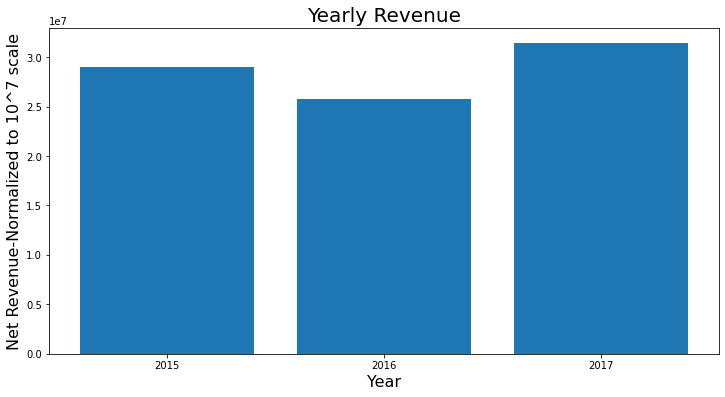

In [31]:

temp=df.groupby(['year']).sum()['net_revenue'].reset_index()
temp
height=list(temp['net_revenue'])
height
bars=('2015','2016','2017')
y_pos = np.arange(len(bars))
plt.figure(figsize=(12, 6))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Net Revenue-Normalized to 10^7 scale',fontsize=16)
plt.title('Yearly Revenue',fontsize=20)
plt.show()

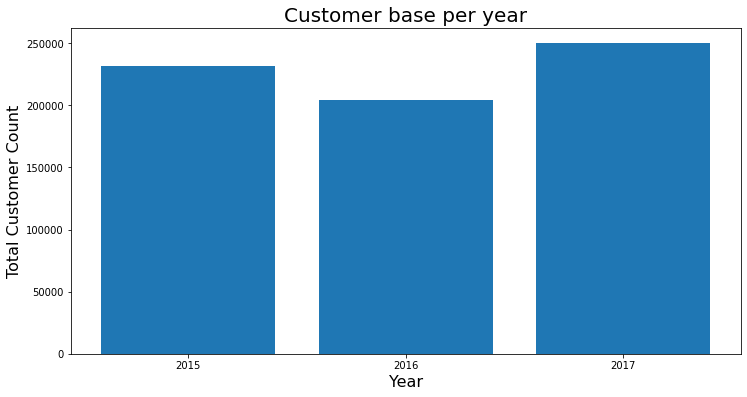

In [32]:
temp=df.groupby(['year']).count()['net_revenue'].reset_index()
temp
height=list(temp['net_revenue'])
height
bars=('2015','2016','2017')
y_pos = np.arange(len(bars))
plt.figure(figsize=(12, 6))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Total Customer Count',fontsize=16)
plt.title('Customer base per year',fontsize=20)
plt.show()

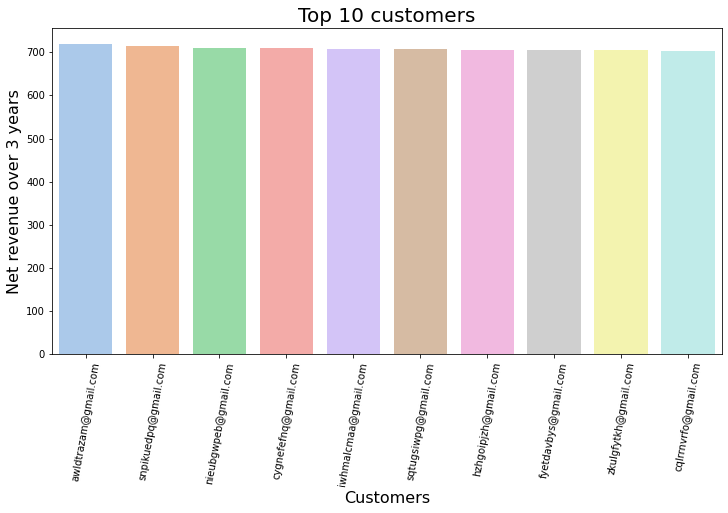

In [33]:
df.groupby(['year']).sum()
top=df.groupby("customer_email").sum().sort_values("net_revenue",ascending=False).head(10)['net_revenue']
top=pd.DataFrame(top).reset_index()
top
plt.figure(figsize=(12, 6))
sns.barplot(x=top["customer_email"], y=top["net_revenue"], palette="pastel")
plt.xticks(rotation=80)

plt.xlabel('Customers',fontsize=16)
plt.ylabel('Net revenue over 3 years',fontsize=16)
plt.title('Top 10 customers',fontsize=20)
plt.show()